In [1]:
# importing initial required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv('C:\\Users\\Ajmal Ansari\\my projects\\Predicting Movie Success\\Data\\TMDB_all_movies.csv')

In [3]:
data.head(n=1)

id  title  vote_average  vote_count    status release_date  revenue  \
0   2  Ariel           7.1       340.0  Released   1988-10-21      0.0   

   runtime  budget    imdb_id  ... spoken_languages  \
0     73.0     0.0  tt0094675  ...            suomi   

                                                cast        director  \
0  Eetu Hilkamo, Turo Pajala, Jorma Markkula, Han...  Aki Kaurismäki   

   director_of_photography         writers       producers music_composer  \
0            Timo Salminen  Aki Kaurismäki  Aki Kaurismäki            NaN   

  imdb_rating imdb_votes                       poster_path  
0         7.4     9019.0  /ojDg0PGvs6R9xYFodRct2kdI6wC.jpg  

[1 rows x 28 columns]

In [4]:
#data shape
data.shape

(1064670, 28)

In [5]:
#checking if there are any missing values
data.isnull().sum()

id                              0
title                          13
vote_average                    2
vote_count                      2
status                          2
release_date               120643
revenue                         2
runtime                         2
budget                          2
imdb_id                    456546
original_language               2
original_title                 12
overview                   188164
popularity                      2
tagline                    904354
genres                     305576
production_companies       570209
production_countries       420495
spoken_languages           406912
cast                       351308
director                   190205
director_of_photography    804723
writers                    544767
producers                  721567
music_composer             958211
imdb_rating                624078
imdb_votes                 624078
poster_path                300669
dtype: int64

In [6]:
#removing missing data rows

data.dropna(inplace=True)


In [7]:
#shape of the data after dropping rows with missing values
data.shape

(26558, 28)

In [8]:
#categorizing the dependent variable into three classes

bins = [ 1, 3, 6, 10]
labels = ['FLOP', 'AVG', 'HIT']
data['imdb_binned'] = pd.cut(data['imdb_rating'], bins=bins, labels=labels)

In [9]:
# Exporting data to mysql for powerbi dashboard

# pip install sqlalchemy psycopg2-binary
# pip install pymysql

In [10]:
# from sqlalchemy import create_engine

# username = 'root'
# password = 'gsymv'
# host = 'localhost'
# port = '3306' 
# database = 'database_11'
# table_name = 'tmdb_data'

# connection_string = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}'
# engine = create_engine(connection_string)

# data.to_sql(table_name, engine, if_exists='replace', index=False)

In [11]:
data.head(n=1)

id       title  vote_average  vote_count    status release_date    revenue  \
2   5  Four Rooms           5.9      2674.0  Released   1995-12-09  4257354.0   

   runtime     budget    imdb_id  ...  \
2     98.0  4000000.0  tt0113101  ...   

                                                cast  \
2  Quinn Hellerman, Quentin Tarantino, Ione Skye,...   

                                            director  \
2  Allison Anders, Quentin Tarantino, Robert Rodr...   

                             director_of_photography  \
2  Rodrigo García, Guillermo Navarro, Phil Parmet...   

                                             writers  \
2  Allison Anders, Robert Rodriguez, Quentin Tara...   

                                           producers      music_composer  \
2  Quentin Tarantino, Lawrence Bender, Alexandre ...  Combustible Edison   

  imdb_rating imdb_votes                       poster_path imdb_binned  
2         6.7   113626.0  /pyCk5JgtRZwRxnXwfrvyzukaKue.jpg         HIT  

[1 rows x 29 columns]

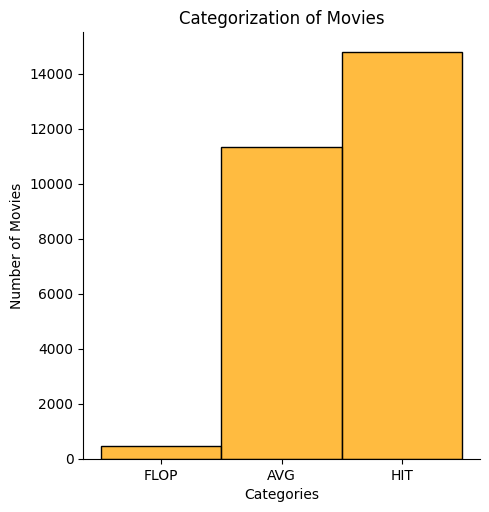

In [12]:
#distribution of dependent variable categories

sns.displot(x='imdb_binned',data=data, color='orange')

plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')

plt.savefig('dependent variable distribution.png')

In [13]:
#List of variables in the dataset
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer', 'imdb_rating', 'imdb_votes', 'poster_path',
       'imdb_binned'],
      dtype='object')

In [14]:
#dropping uninformative columns
#title, status, imdb_id, imdb_rating, revenue, and poster path
#we can't us imdb_votes variable also since it defeats the purpose

data.drop(columns=['title','status','imdb_id','imdb_rating','revenue','poster_path','original_title','imdb_votes'],inplace=True)

In [15]:
data.head(n=1)

id  vote_average  vote_count release_date  runtime     budget  \
2   5           5.9      2674.0   1995-12-09     98.0  4000000.0   

  original_language                                           overview  \
2                en  It's Ted the Bellhop's first night on the job....   

   popularity                                            tagline  ...  \
2      15.938  Twelve outrageous guests. Four scandalous requ...  ...   

    production_companies      production_countries spoken_languages  \
2  Miramax, A Band Apart  United States of America          English   

                                                cast  \
2  Quinn Hellerman, Quentin Tarantino, Ione Skye,...   

                                            director  \
2  Allison Anders, Quentin Tarantino, Robert Rodr...   

                             director_of_photography  \
2  Rodrigo García, Guillermo Navarro, Phil Parmet...   

                                             writers  \
2  Allison Anders, Robert Rodriguez, Quentin Tara...   

                                           producers      music_composer  \
2  Quentin Tarantino, Lawrence Bender, Alexandre ...  Combustible Edison   

  imdb_binned  
2         HIT  

[1 rows x 21 columns]

In [16]:
#feature engineering

#extracting day of the month and month from the release_date feature
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_day'] = data['release_date'].dt.day
data['release_month'] = data['release_date'].dt.month

#dropping the original string variable 

data.drop(columns=['release_date'],inplace=True)



In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26558 entries, 2 to 1060896
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       26558 non-null  int64   
 1   vote_average             26558 non-null  float64 
 2   vote_count               26558 non-null  float64 
 3   runtime                  26558 non-null  float64 
 4   budget                   26558 non-null  float64 
 5   original_language        26558 non-null  object  
 6   overview                 26558 non-null  object  
 7   popularity               26558 non-null  float64 
 8   tagline                  26558 non-null  object  
 9   genres                   26558 non-null  object  
 10  production_companies     26558 non-null  object  
 11  production_countries     26558 non-null  object  
 12  spoken_languages         26558 non-null  object  
 13  cast                     26558 non-null  object  
 14  director 

In [18]:
data.head(n=1)

id  vote_average  vote_count  runtime     budget original_language  \
2   5           5.9      2674.0     98.0  4000000.0                en   

                                            overview  popularity  \
2  It's Ted the Bellhop's first night on the job....      15.938   

                                             tagline  genres  ...  \
2  Twelve outrageous guests. Four scandalous requ...  Comedy  ...   

  spoken_languages                                               cast  \
2          English  Quinn Hellerman, Quentin Tarantino, Ione Skye,...   

                                            director  \
2  Allison Anders, Quentin Tarantino, Robert Rodr...   

                             director_of_photography  \
2  Rodrigo García, Guillermo Navarro, Phil Parmet...   

                                             writers  \
2  Allison Anders, Robert Rodriguez, Quentin Tara...   

                                           producers      music_composer  \
2  Quentin Tarantino, Lawrence Bender, Alexandre ...  Combustible Edison   

  imdb_binned release_day release_month  
2         HIT           9            12  

[1 rows x 22 columns]

In [19]:
data.columns

Index(['id', 'vote_average', 'vote_count', 'runtime', 'budget',
       'original_language', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer', 'imdb_binned', 'release_day', 'release_month'],
      dtype='object')

In [20]:
#converting categorical columns into numerical columns using label encoding

from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['original_language','genres', 'production_companies', 'production_countries', 
                     'spoken_languages', 'cast', 'writers', 'producers', 
                     'music_composer', 'director_of_photography', 'director']

for col in columns_to_encode:
    data[col] = LabelEncoder().fit_transform(data[col])


In [21]:
#dropping remaining columns

data.drop(columns=['id','overview','tagline'],inplace=True)

In [22]:
#converting the dependent variable also into numerical column

data['imdb_binned'] = data['imdb_binned'].replace({'FLOP': 0, 'AVG': 1,'HIT':2})



C:\Users\Ajmal Ansari\AppData\Local\Temp\ipykernel_9068\640307671.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['imdb_binned'] = data['imdb_binned'].replace({'FLOP': 0, 'AVG': 1,'HIT':2})
C:\Users\Ajmal Ansari\AppData\Local\Temp\ipykernel_9068\640307671.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['imdb_binned'] = data['imdb_binned'].replace({'FLOP': 0, 'AVG': 1,'HIT':2})


In [23]:
data.head()

vote_average  vote_count  runtime      budget  original_language  \
2         5.900      2674.0     98.0   4000000.0                 14   
3         6.500       333.0    109.0  21000000.0                 14   
6         8.203     20926.0    121.0  11000000.0                 14   
7         7.817     19492.0    100.0  94000000.0                 14   
8         8.468     27892.0    142.0  55000000.0                 14   

   popularity  genres  production_companies  production_countries  \
2      15.938     972                 11359                  1528   
3      12.110     244                  9589                  1528   
6      79.810     530                 10263                  1528   
7      93.477     910                 13786                  1528   
8     102.640    1111                 13355                  1528   

   spoken_languages   cast  director  director_of_photography  writers  \
2               246  20346       465                     6593      869   
3               246  23640     10240                     5942    10414   
6               246  22242      3586                     2656     7563   
7               246  11634       608                     7002     1141   
8               246  16771      9362                     1947     6409   

   producers  music_composer imdb_binned  release_day  release_month  
2      16678            1646           2            9             12  
3       6954             165           2           15             10  
6       6863            4384           2           25              5  
7      10284            8412           2           30              5  
8      19797             165           2           23              6

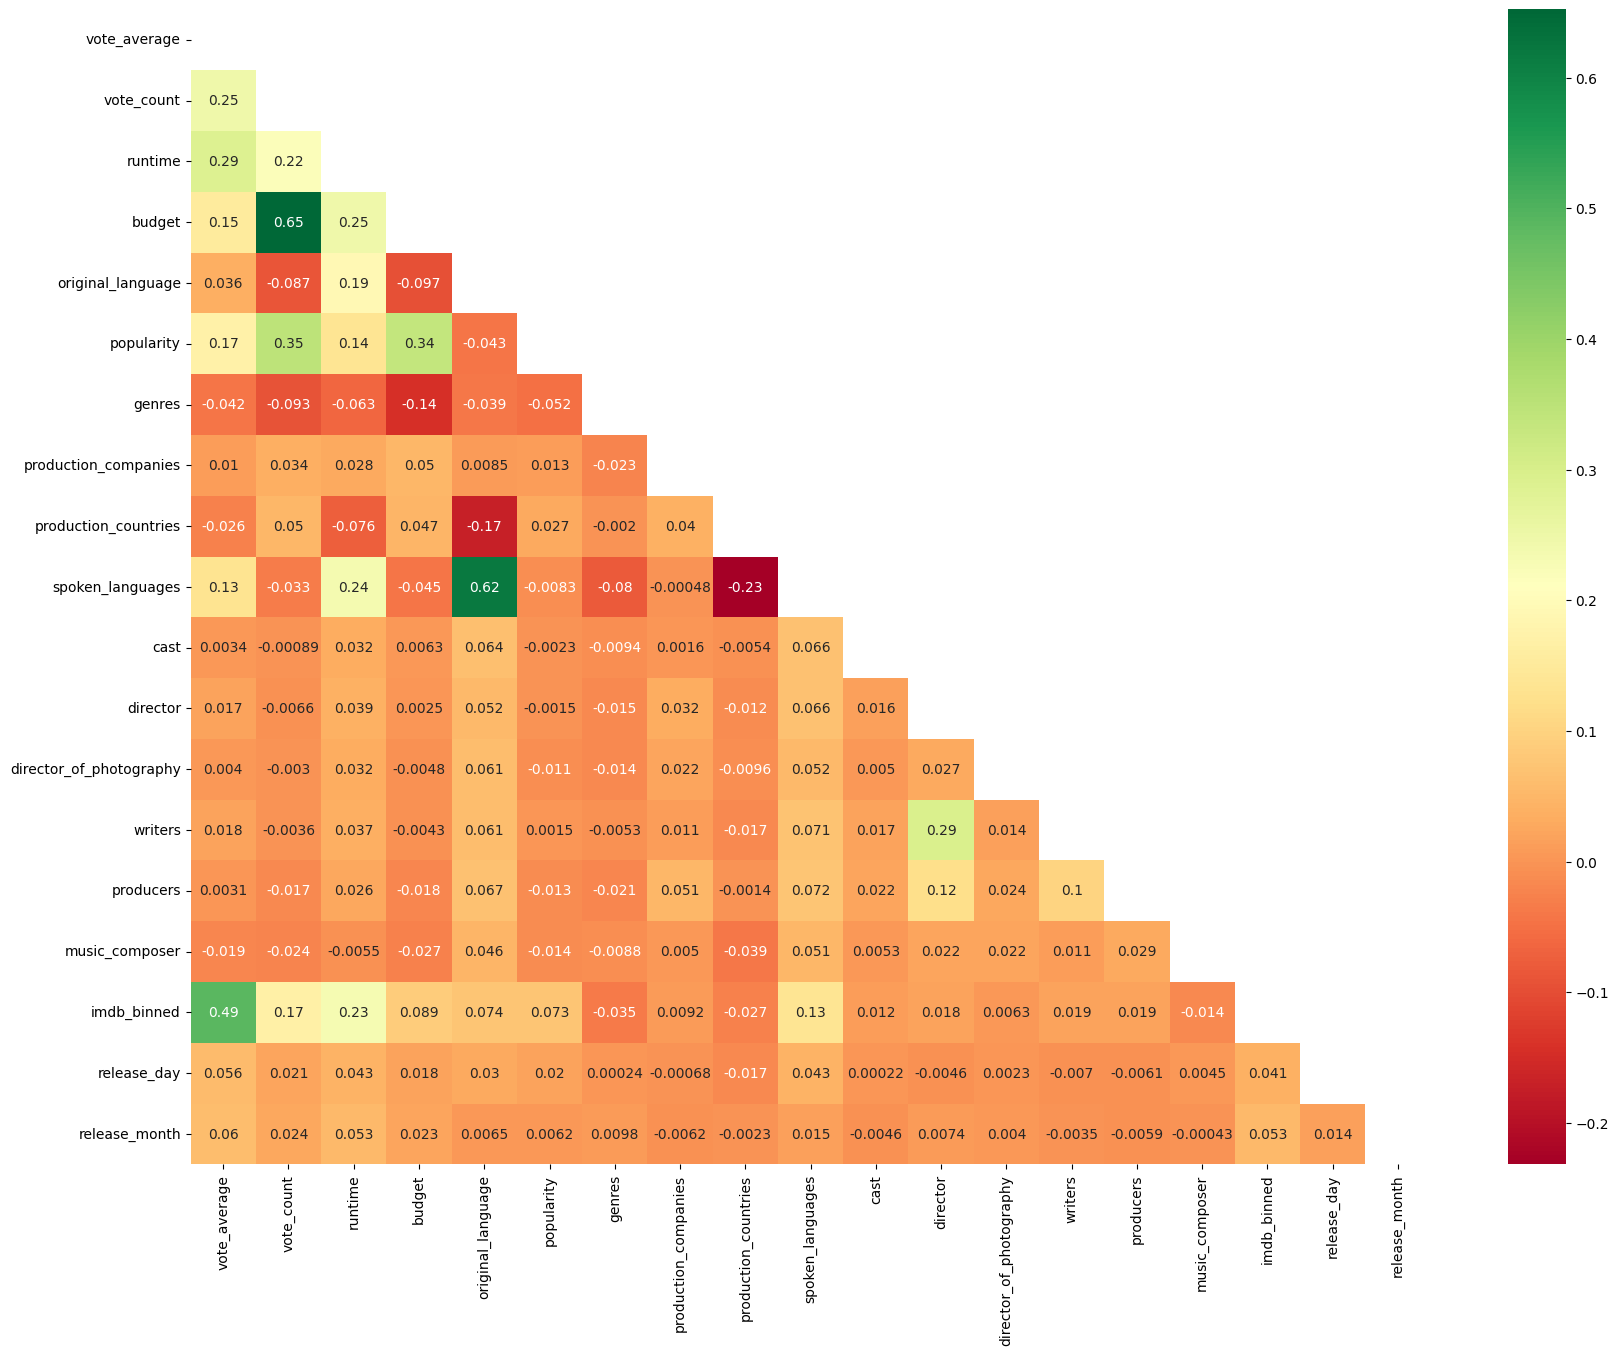

In [24]:
#Finding Correlation between variables
corr = data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

plt.savefig('correlationamongvariables.png')

In [25]:
data.head(n=1)

vote_average  vote_count  runtime     budget  original_language  \
2           5.9      2674.0     98.0  4000000.0                 14   

   popularity  genres  production_companies  production_countries  \
2      15.938     972                 11359                  1528   

   spoken_languages   cast  director  director_of_photography  writers  \
2               246  20346       465                     6593      869   

   producers  music_composer imdb_binned  release_day  release_month  
2      16678            1646           2            9             12

In [26]:
#The variables that are correlated cause errors in the prediction, so removing them
#spoken language is correlated with original language hence removing spoken languages
data.drop(columns=['spoken_languages'],inplace=True)

In [27]:
#scaling eligible numeric features using StandardScaler

from sklearn.preprocessing import StandardScaler

columns_to_scale = ['vote_average','vote_count','runtime','budget','popularity','release_day','release_month']  


scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])



In [28]:
#Defining X and y variables now

X=data.drop(columns=['imdb_binned'])
y=data['imdb_binned']



In [29]:
#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)


In [30]:
data.head()

vote_average  vote_count   runtime    budget  original_language  \
2      0.017331    0.976514 -0.115798 -0.180126                 14   
3      0.453594   -0.161834  0.362812  0.478510                 14   
6      1.691855    9.851838  0.884932  0.091077                 14   
7      1.411192    9.154533 -0.028778  3.306770                 14   
8      1.884538   13.239166  1.798641  1.795781                 14   

   popularity  genres  production_companies  production_countries   cast  \
2    0.186835     972                 11359                  1528  20346   
3    0.039205     244                  9589                  1528  23640   
6    2.650107     530                 10263                  1528  22242   
7    3.177186     910                 13786                  1528  11634   
8    3.530564    1111                 13355                  1528  16771   

   director  director_of_photography  writers  producers  music_composer  \
2       465                     6593      869      16678            1646   
3     10240                     5942    10414       6954             165   
6      3586                     2656     7563       6863            4384   
7       608                     7002     1141      10284            8412   
8      9362                     1947     6409      19797             165   

  imdb_binned  release_day  release_month  
2           2    -0.688191       1.500806  
3           2    -0.018852       0.919042  
6           2     1.096713      -0.535369  
7           2     1.654495      -0.535369  
8           2     0.873600      -0.244486

In [31]:
#selecting important features using random forest's feature importances

from sklearn.ensemble import RandomForestClassifier


# Training Random Forest model
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)





RandomForestClassifier(n_estimators=1000, random_state=42)

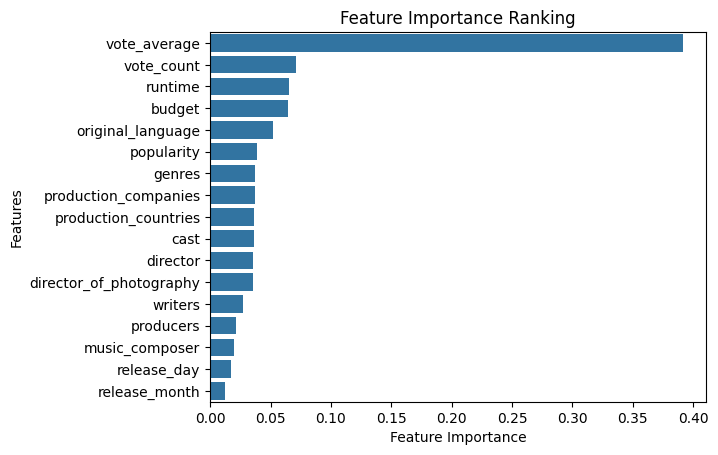

In [32]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

sorted_idx = feature_importances.sort_values(ascending=False)

sns.barplot(x=sorted_idx.values, y=feature_importances.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Ranking")

plt.savefig('variableselection.png')

In [33]:
#dropping unimportant features
X.drop(columns=['release_day','release_month'],inplace=True)
X_train.drop(columns=['release_day','release_month'],inplace=True)
X_test.drop(columns=['release_day','release_month'],inplace=True)

In [34]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(26558, 15)
(18590, 15)
(7968, 15)


In [35]:
print(y_train.shape)
print(y_test.shape)

(18590,)
(7968,)


In [36]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models=[LogisticRegression(max_iter=100000000),XGBClassifier(),
        RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=7)]

results = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append([model.__class__.__name__, accuracy_score(y_test, y_pred)])

df_results = pd.DataFrame(results, columns=["Model", "Accuracy"])
print(df_results)

c:\Users\Ajmal Ansari\my projects\python 3.12 virtual environment\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Accuracy
0      LogisticRegression  0.786772
1           XGBClassifier  0.829066
2  RandomForestClassifier  0.826556
